# Quiz 04
## Using Zonal Statistics to Evaluate Air Quality during the Woolsey Fire

In previous assignments you have worked with Sentinel-2 data. Today you will work with a different satellite in the Sentinel cluster: Sentinel 5P. One calculated parameter from Sentinel-5p is something call the Aerosol Index. The Aerosol Index (AI) is a qualitative index indicating the presence of elevated layers of aerosols with significant absorption. The main aerosol types that cause signals detected in the AI are desert dust, biomass burning and volcanic ash plumes. An advantage of the AI is that it can be derived for clear as well as (partly) cloudy ground pixels.

Let's revisit some air quality data from November 9th, 2018 - the day after the Woolsey fire started. You are provided the AI from Sentinel-5P (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) for the following area of interest:

![_._](data/aoi.png)


Complete and answer the following questions:
1. Load the AI data for November 9th, 2018 (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) and visualize (if using ```rasterio``` you can use the command ```show(ai_data)``` to plot, or ```ai_data.plot()``` if using rioxarray), including a colormap (```cmap```) that makes sense for this visualization (https://matplotlib.org/stable/tutorials/colors/colormaps.html). What patterns do you see?
2. Select two areas within the above area of interest box which is roughly around LA county. For example, we used the cities of Topanga and San Fernando in class last week. Select two different cities of your choice, and retrieve their geometries using the ```osmnx``` package. If you're not familiar with city names in LA county, go to Google Maps. 
3. Plot the retrieved polygons over the AI data to make sure both are within bounds of the AI data.
4. Calculate the zonal statistics of both cities you selected, and display the max AI values for both cities. Which city had the higher AI? Does this coincide with what you visually observe?

In [13]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np
import rioxarray as rxr
import geopandas as gpd

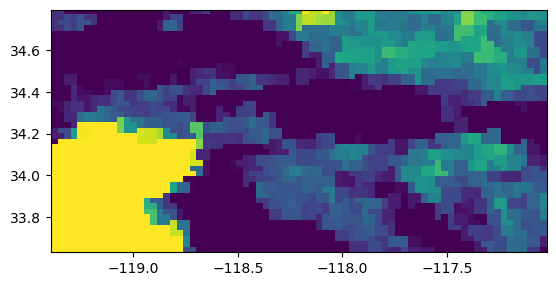

<AxesSubplot:>

In [14]:
ai_data_path = r"data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff"

ai_data = rasterio.open(ai_data_path)


show(ai_data)

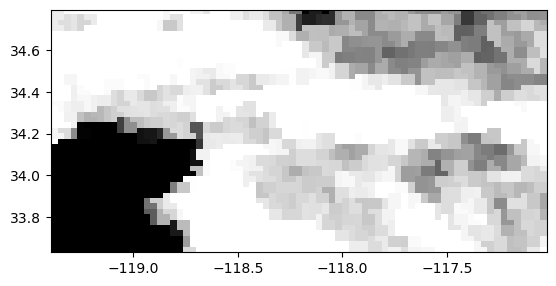

<AxesSubplot:>

In [15]:
# ai_data.plot(
#             cmap="YlOrBr",
#             )
# plt.show()
show(ai_data,cmap="Greys")

## What Patterns are visible?

As shown in the darker the pixels the higher the presence of elevated layers of aerosols 

In [16]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt

In [26]:
# Keywords in such format that they can be found from OSM
la_q = "Los Angeles, California, United States of America"
Pasadena_q = "Pasadena, California, United States of America"


In [27]:
# Retrieve the geometries of those areas using osmnx
la = ox.geocode_to_gdf(la_q)
pasadena = ox.geocode_to_gdf(Pasadena_q)

print(la.crs)
print(pasadena.crs)

epsg:4326
epsg:4326


In [28]:
type(pasadena)

geopandas.geodataframe.GeoDataFrame

In [29]:
type(la)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

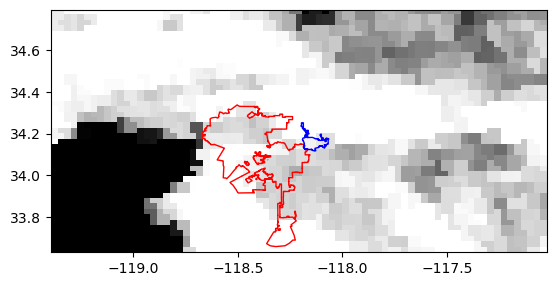

In [30]:
# Plot the Polygons on top of the DEM
ax = la.plot(facecolor='None', edgecolor='red', linewidth=1)
ax = pasadena.plot(ax=ax, facecolor='None', edgecolor='blue', linewidth=1)

             
# Plot DEM
show((ai_data, 1), ax=ax, cmap='Greys')

In [31]:
# Read the raster values
array = ai_data.read(1)

# Get the affine
affine = ai_data.transform

In [32]:
type(affine)

affine.Affine

In [33]:
# Calculate zonal statistics for Topanga
zs_la = zonal_stats(la, array, affine=affine, stats=[ 'max'])

# Calculate zonal statistics for Long Beach
zs_pasadena = zonal_stats(pasadena, array, affine=affine, stats=[ 'max'])


In [34]:
print(zs_la)
print(zs_pasadena)

[{'max': 108.0}]
[{'max': 55.0}]


###
Even though in Pasadena the pixels are not white but since the City of Los Angeles covers a bigger area the amount of aerosols as shown in the calculation the maximum is higher and so if there is even one pixel that has a higher aerosol value that will be the output of zonal stats when asked for the max value and since I do see pixels in LA darker than Pasadena it makes since that the value is higher